# 1 - Representativeness of the Collected Data - Exam Data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('events-and-resources.csv', delimiter=";", encoding="utf-8")

In [3]:
results["status"] = np.where(results["student_id"] == 2, 'anonym', 'pseudonym')

In [4]:
pseudonym = results[results['student_id'] != 2]
anonym = results[results['student_id'] == 2]

In [5]:
gem = pd.read_csv('task-and-exam-marks-in-groups.csv', delimiter=";", encoding="utf-8")
del gem["Unnamed: 0"]
gem.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,...,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,...,0.0,0.0,0.0,0.0,1.0,0.0,inf,1.0,tec,ba
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,...,7.0,8.5,52.0,3.3,2.0,1.0,inf,1.0,tec,ba
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,inf,1.0,tec,ba
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,...,1.5,4.0,38.5,5.0,4.0,0.0,inf,3.0,tec,ba


In [6]:
pseudo = set(pseudonym["student_id"])

In [7]:
gem_id = set(gem["student_id"])

In [8]:
ano = gem_id - pseudo

In [9]:
ano_set = gem[gem['student_id'].isin(ano)]
ano_set.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,...,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,...,0.0,0.0,0.0,0.0,1.0,0.0,inf,1.0,tec,ba
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,...,7.0,8.5,52.0,3.3,2.0,1.0,inf,1.0,tec,ba
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,inf,1.0,tec,ba
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,...,1.5,4.0,38.5,5.0,4.0,0.0,inf,3.0,tec,ba


In [10]:
pseudo_set = gem[gem['student_id'].isin(pseudo)]
pseudo_set.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,...,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
40,tutor4,-2.0,15.0,13.5,14.5,15.0,14.0,8.0,7.0,11.0,...,1.0,4.0,43.5,4.0,40.0,1.0,psy,9.0,soc,ba
46,tutor4,79.0,15.0,15.0,14.5,14.0,13.5,15.0,15.0,14.5,...,0.0,0.0,0.0,5.0,46.0,0.0,inf,2.0,tec,ba
47,tutor1,1106.0,9.5,11.0,7.5,11.0,0.0,0.0,14.0,7.5,...,4.0,3.0,35.5,5.0,47.0,0.0,inf,1.0,tec,ba
86,tutor4,74.0,15.0,13.0,15.0,13.5,12.5,4.0,15.0,8.0,...,0.0,0.0,0.0,0.0,86.0,0.0,inf,2.0,tec,ba
96,tutor5,5019.0,15.0,14.0,15.0,15.0,13.0,0.0,15.0,15.0,...,NaN,NaN,NaN,NaN,96.0,0.0,NaN,NaN,NaN,NaN


In [11]:
ano_set.describe()

,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,a3,a4,a5,a6,a7,punkte,note,student_id,pass,semester
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,225.000000,225.000000,195.000000
mean,937.346667,13.088889,11.351111,12.000000,11.308889,7.322222,9.082222,10.524444,9.160000,9.664444,...,4.497423,6.337629,4.974227,3.912371,5.056701,33.979381,2.181443,116.888889,0.426667,2.646154
std,1760.132700,3.339410,4.040676,3.376322,3.755521,5.308933,4.181287,4.352552,4.684339,4.296965,...,3.641833,5.021526,4.226043,3.900651,4.713214,27.054868,1.881534,68.213302,0.495696,2.377498
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,26.000000,13.000000,10.500000,11.000000,10.000000,2.000000,6.500000,9.000000,6.500000,7.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,1.000000
50%,62.000000,14.000000,13.000000,13.000000,12.500000,8.000000,10.000000,12.000000,10.000000,11.000000,...,5.250000,8.000000,5.500000,3.000000,4.000000,41.750000,2.150000,117.000000,0.000000,1.000000
75%,1102.000000,14.500000,14.000000,14.500000,14.000000,12.500000,12.500000,13.500000,13.000000,13.000000,...,8.000000,11.000000,9.000000,7.375000,9.000000,56.000000,3.700000,175.000000,1.000000,5.000000
max,5020.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,10.000000,14.000000,12.000000,12.000000,16.000000,80.500000,5.000000,234.000000,1.000000,15.000000


In [12]:
pseudo_set.describe()

,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,a3,a4,a5,a6,a7,punkte,note,student_id,pass,semester
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,10.000000,10.000000,8.000000
mean,1359.800000,13.700000,12.900000,13.100000,13.500000,10.950000,7.700000,12.700000,10.600000,12.15000,...,4.375000,7.125000,6.437500,4.562500,4.375000,38.625000,3.037500,119.500000,0.400000,3.250000
std,1986.477497,1.932184,1.791957,2.258318,1.581139,4.996944,5.447731,2.760837,4.060651,2.09563,...,4.051014,5.566161,3.994975,5.024494,3.652299,27.456134,1.966097,65.929676,0.516398,2.866058
min,-2.000000,9.500000,10.000000,7.500000,10.500000,0.000000,0.000000,7.000000,5.000000,9.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,1.000000
25%,62.000000,13.625000,11.500000,12.250000,13.125000,10.625000,4.375000,12.000000,7.625000,10.50000,...,0.000000,2.250000,6.000000,0.750000,2.250000,25.125000,1.600000,56.750000,0.000000,1.000000
50%,592.000000,14.500000,13.500000,13.750000,14.000000,13.000000,7.750000,13.750000,10.250000,12.25000,...,4.500000,8.000000,8.250000,2.750000,4.000000,39.500000,3.150000,118.000000,0.000000,2.000000
75%,1136.750000,15.000000,13.875000,14.500000,14.500000,13.875000,12.500000,14.875000,14.875000,13.75000,...,8.500000,12.000000,9.000000,7.500000,6.125000,61.125000,5.000000,174.750000,1.000000,5.000000
max,5019.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,...,9.000000,14.000000,9.000000,12.000000,9.500000,70.000000,5.000000,219.000000,1.000000,9.000000


In [13]:
mannwhitneyu(ano_set["punkte"], pseudo_set["punkte"], alternative='two-sided')

MannwhitneyuResult(statistic=1020.5, pvalue=0.61690712759234811)

In [14]:
mannwhitneyu(ano_set["note"], pseudo_set["note"], alternative='two-sided')

MannwhitneyuResult(statistic=871.0, pvalue=0.22208156527510459)

C:\Users\laris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


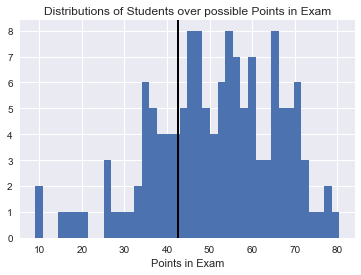

In [15]:
plt.hist(gem["punkte"][gem["punkte"] > 0].dropna(), 40)
plt.axvline(x=42.5, linewidth=2, color='k')
plt.title("Distributions of Students over possible Points in Exam")
plt.xlabel("Points in Exam")
plt.legend()
plt.show()